# Build and Evaluate an ANN for Wine Quality

## 1. Preprocess and Explore the Dataset

### 1.1 Installing and Importing Python libraries (numpy, pandas, tensorflow, and matplotlib):

In [1]:
# %pip install numpy
# %pip install pandas
# %pip install tensorflow
# %pip install sklearn
# %pip install matplotlib
# %pip install seaborn
# %pip install optuna

In [2]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd
# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import optuna

2025-02-03 13:21:05.540985: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 13:21:05.544093: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 13:21:05.553302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738581665.570143    4513 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738581665.576248    4513 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 13:21:05.599960: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### 1.2 Loading the Data:

In [4]:
data = pd.read_csv('winequality-white.csv', delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Early Insights:**
- We have 4898 rows with 12 columns with numerical values.
- there aren't any missing data.
- there are many features with a big difference between third percentile and the maximum value that indication of right skewed distrbution and maybe an outliers, we need to handle it later.

### 1.3 Checking for Outliers:

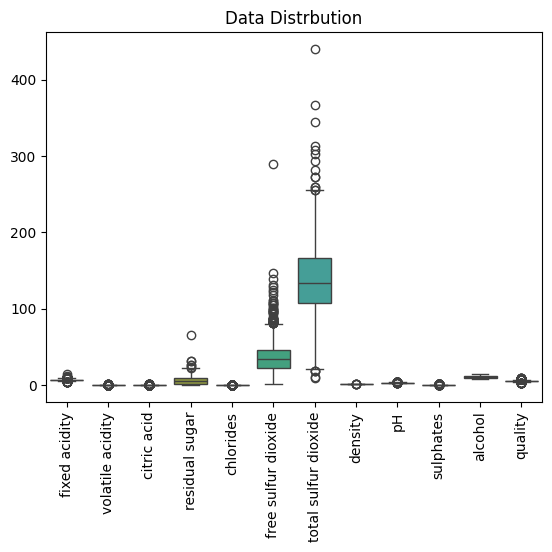

In [8]:
sns.boxplot(data)
plt.title('Data Distrbution')
plt.xticks(rotation=90)
plt.show()

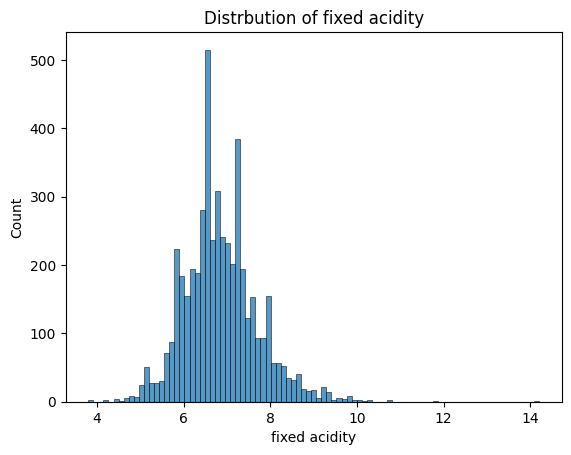

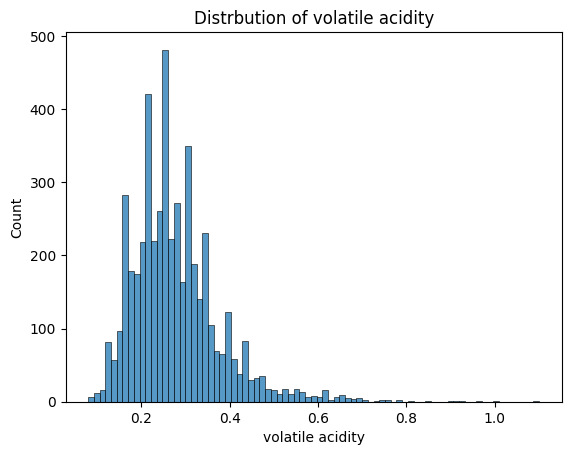

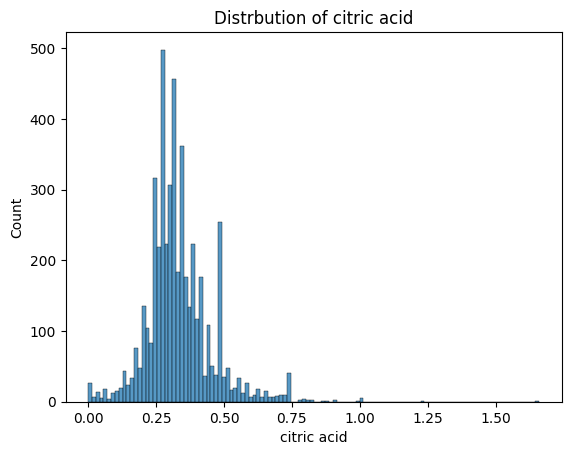

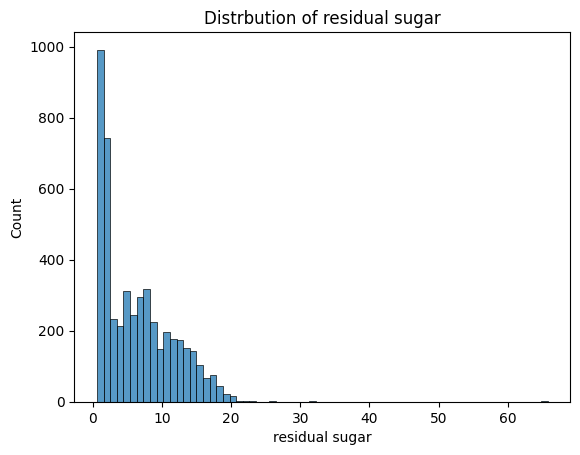

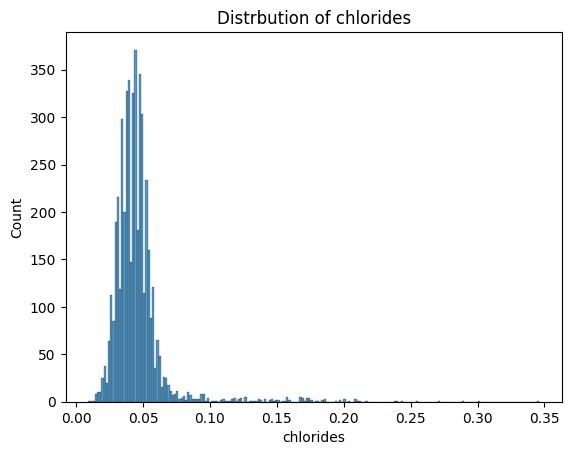

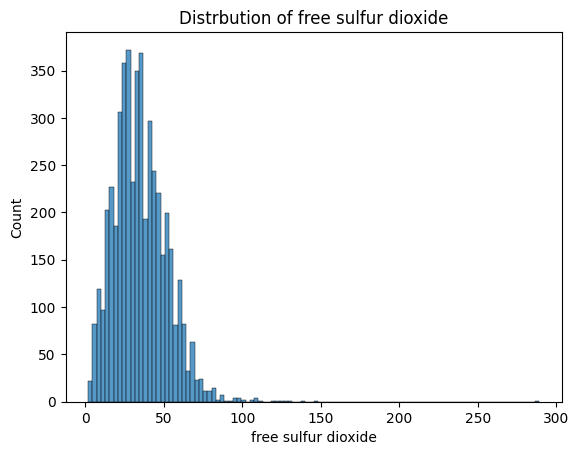

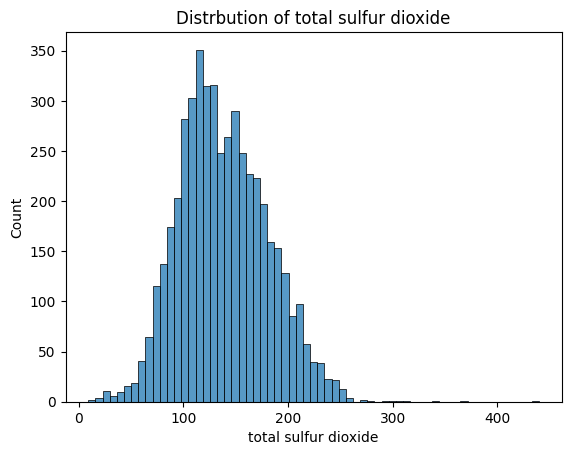

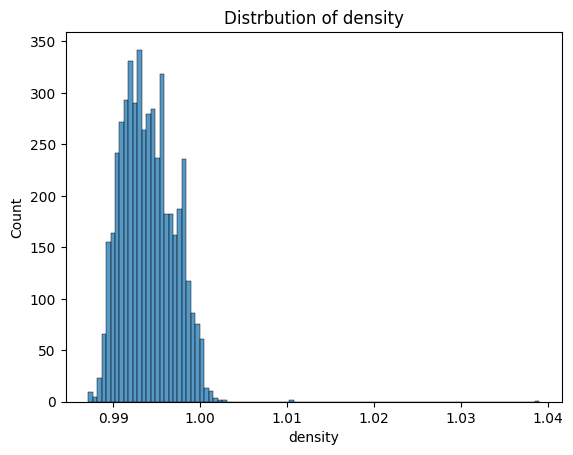

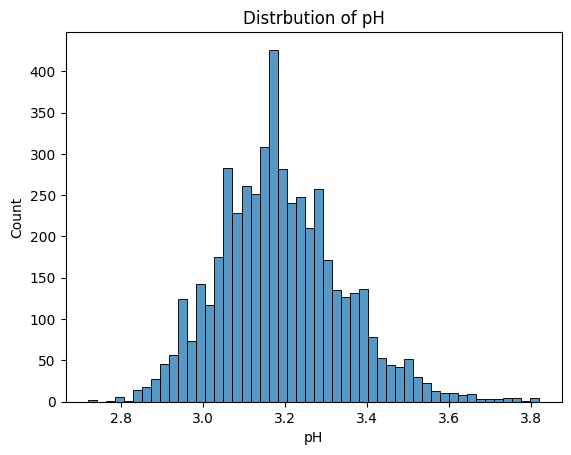

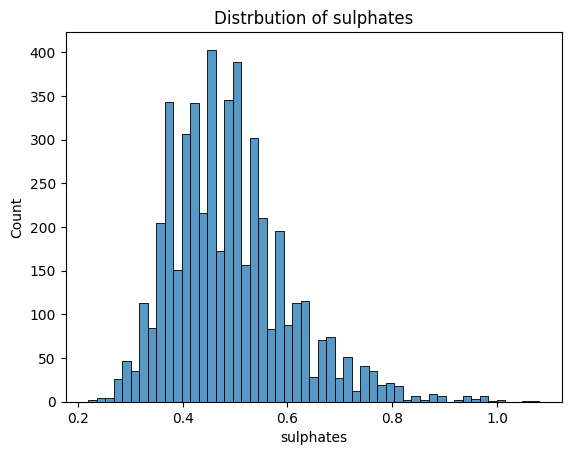

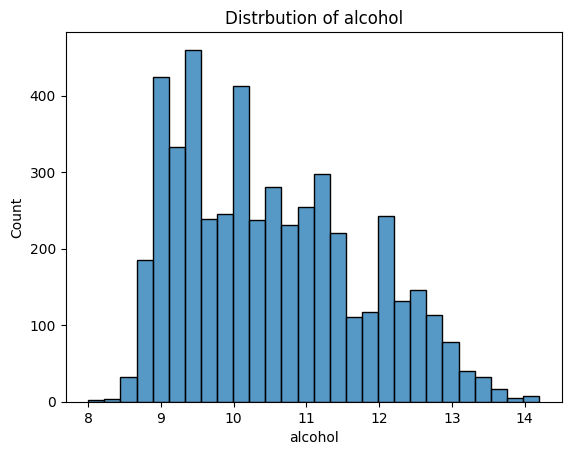

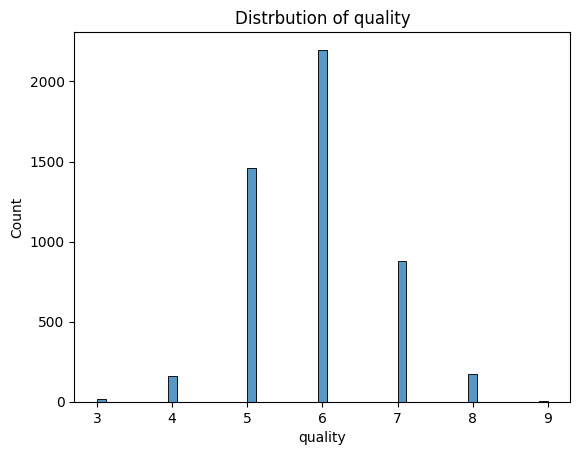

In [10]:
for col in data.columns:
    sns.histplot(data[col])
    plt.title(f'Distrbution of {col}')
    plt.show()

There are a lot of right skewed solutions with outlier values, but I decided to keep them, because of the context of our analysis, we need to be able to predict the quality of the wine, and maybe the far values that can indicate very poor quality or the reverse.

### 1.4 Spliting the data to test and train:

we will use stratify sampling because our target classes are not balanced.

In [11]:
X = data.drop(columns='quality')
y = data['quality']

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, stratify=y, test_size=0.2)

In [15]:
y_train.value_counts()/y_train.shape[0]

quality
6    0.448698
5    0.297601
7    0.179684
8    0.035733
4    0.033180
3    0.004084
9    0.001021
Name: count, dtype: float64

In [16]:
y_test.value_counts()/y_test.shape[0]

quality
6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: count, dtype: float64

the ratio of the quality class on the train and test datasets are almost identical.

### 1.5 Encode the target labels:

In [18]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_train.head()

,3,4,5,6,7,8,9
3568,False,False,False,False,True,False,False
4109,False,False,False,True,False,False,False
1243,False,False,False,False,True,False,False
3333,False,False,False,True,False,False,False
4403,False,False,True,False,False,False,False


### 1.6 Normalize the features:

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train[0]

array([ 1.13393641, -1.26371721,  0.05093112, -1.04071065, -0.48254502,
       -0.24445772, -1.05135552, -1.01960401, -0.78250223,  2.03051614,
        0.6323345 ])

## 2. Build and Train the ANN:

In [28]:
# Define function to create ANN model
def create_model(n_neurons=64, activation='relu', learning_rate=0.001):
    model = keras.Sequential([
        layers.Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(n_neurons//2, activation=activation),
        layers.Dense(y_train.shape[1], activation='softmax')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/20


/home/ay7/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3751 - loss: 1.6163 - val_accuracy: 0.4816 - val_loss: 1.2598
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5066 - loss: 1.2116 - val_accuracy: 0.5418 - val_loss: 1.1638
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5402 - loss: 1.1557 - val_accuracy: 0.5490 - val_loss: 1.1057
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5591 - loss: 1.0928 - val_accuracy: 0.5571 - val_loss: 1.0808
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5560 - loss: 1.0720 - val_accuracy: 0.5592 - val_loss: 1.0713
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5582 - loss: 1.0620 - val_accuracy: 0.5704 - val_loss: 1.0587
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5651 - loss: 1.0639 - val_accuracy: 0.5684 - val_loss: 1.0534
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5655 - loss: 1.0593 - val_accuracy: 0.5663 - val_loss: 1.0556
Epo

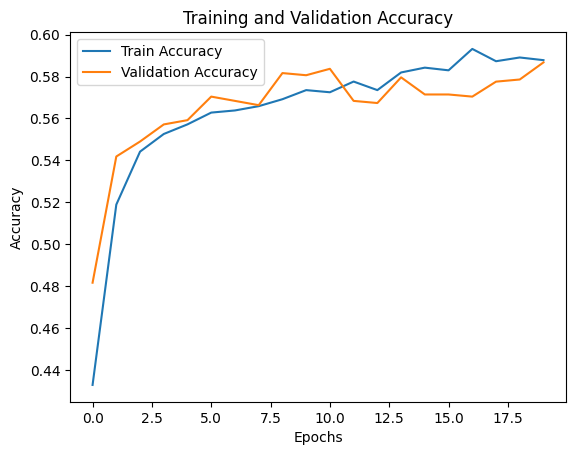

In [30]:
# Train initial model
model = create_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)

# Plot training process
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()